In [1]:
using Revise
using BiMDPs

[ Info: Precompiling BiMDPs [8af17bd5-7ea0-4ae2-8fd5-dbf3cdd18bce]


In [30]:
dir = "case011"

"case011"

In [31]:
rgw = case_dictionary[dir]

BiMDPs.MRoverWorld.MRoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 25
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles_grid: Array{Float64}((10, 10, 25)) [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; -5.0 -5.0 … 0.0 0.0; -5.0 -5.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; -5.0 -5.0 … -5.0 0.0; … ; -5.0 -5.0 … -5.0 0.0; -5.0 -5.0 … -5.0 0.0;;; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 -5.0; … ; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 0.0]
  exit_xys: Array{Tuple{Int64, Int64}}((1,))
  measure_reward: Float64 2.0


## Plot rewards grid

In [91]:
BiMDPs.create_reward_field_evolution_gif(rgw; dir=dir)

"case013/reward_evolution.gif"

In [92]:
BiMDPs.create_reward_field_evolution_imgs(rgw; dir=dir)

Creating figure for t = 1 to 30
Creating figure for t = 31
Creating figure for t = 32
Creating figure for t = 33
Creating figure for t = 34
Creating figure for t = 35
Creating figure for t = 36
Creating figure for t = 37
Creating figure for t = 38
Creating figure for t = 39
Creating figure for t = 40
Creating figure for t = 41
Creating figure for t = 42
Creating figure for t = 43
Creating figure for t = 44
Creating figure for t = 45
Creating figure for t = 46
Creating figure for t = 47
Creating figure for t = 48
Creating figure for t = 49
Creating figure for t = 50
Creating figure for t = 51
Creating figure for t = 52
Creating figure for t = 53
Creating figure for t = 54
Creating figure for t = 55
Creating figure for t = 56
Creating figure for t = 57
Creating figure for t = 58
Creating figure for t = 59
Creating figure for t = 60


## Do one instance of a solve with Fine-grained MDP

In [44]:
using Random
rng = Random.seed!(22)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_finegrained_mdp(rgw, max_iters=100, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

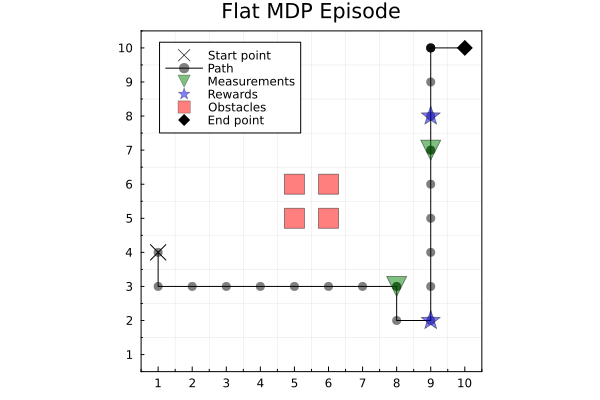

In [45]:
# BiMDPs.plot_finegrained_simulated_episode(rgw, sar_history, dir=dir)
BiMDPs.plot_finegrained_simulated_episode(rgw, sar_history, fname="flat_mdp_episode_2", dir=dir)

## Do one instance of a solve with Bi-Level MDP

In [46]:
using Random
rng = Random.seed!(22)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_bilevel_mdp(rgw, max_iters=200, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

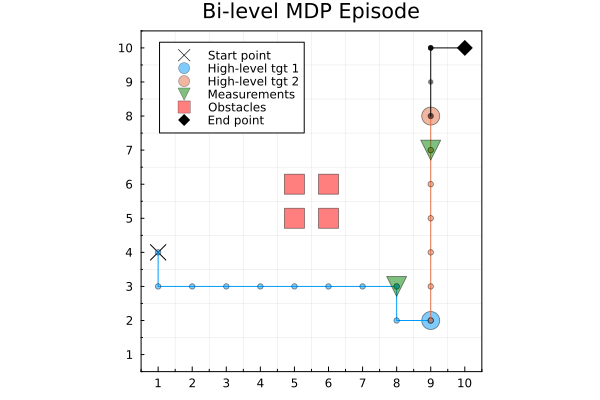

In [47]:
BiMDPs.plot_bilevel_simulated_episode(rgw, sar_history, fname="bilevel_mdp_episode_2", dir=dir)

## Compare optimality vs computation time


In [97]:
# results = optimality_vs_compute(rgw, [("bl_vi", [50, 10], 100), ("vi", [10,50], 100), ("qlearning", [50,500], 500), ("sarsa", [50,500], 500)], dir=dir)

In [102]:
# results = optimality_vs_compute(rgw, [("vi", [200, 300, 400, 500], 500), ("qlearning", [60000, 90000,100000], 500), ("sarsa", [60000, 90000,100000], 500)], dir=dir)

Reward of vi after 500 simulations: μ = 41.26456672146598, σ = 19.849244233344834
Reward of vi after 500 simulations: μ = 38.0364388724486, σ = 17.387369945678007
Reward of vi after 500 simulations: μ = 40.94231236161782, σ = 19.255862702378312
Reward of vi after 500 simulations: μ = 40.58391081823108, σ = 18.609294075404517
Reward of qlearning after 500 simulations: μ = 14.759055068905703, σ = 22.0130763082105
Reward of qlearning after 500 simulations: μ = 18.852341463054128, σ = 24.435346845505894
Reward of qlearning after 500 simulations: μ = 19.467951799509727, σ = 23.373504977732257
Reward of sarsa after 500 simulations: μ = 6.348746106954612, σ = 15.236802421505248
Reward of sarsa after 500 simulations: μ = 13.324141908526302, σ = 15.894585142542885
Reward of sarsa after 500 simulations: μ = 13.700651406318636, σ = 18.173462871387006


Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 3 entries:
  "vi"        => ([173.578, 168.742, 165.406, 172.725], [41.2646, 38.0364, 40.9…
  "sarsa"     => ([19.1976, 27.1908, 30.268], [6.34875, 13.3241, 13.7007], [15.…
  "qlearning" => ([16.8, 24.3723, 26.4721], [14.7591, 18.8523, 19.468], [22.013…

In [4]:
# results = optimality_vs_compute(rgw, [("qlearning", [floor(Int, 2e6)], 50), ("sarsa", [floor(Int, 2e5), floor(Int, 2e6)], 50)], dir=dir)

Reward of qlearning after 50 simulations: μ = 32.799251669796966, σ = 18.942878210479176
Reward of sarsa after 50 simulations: μ = 19.604542360263657, σ = 17.008067523583925
Reward of sarsa after 50 simulations: μ = 24.318558473126824, σ = 21.112404867237764


Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 2 entries:
  "sarsa"     => ([51.6436, 538.093], [19.6045, 24.3186], [17.0081, 21.1124])
  "qlearning" => ([460.291], [32.7993], [18.9429])

In [137]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1, 10, 50, 100, 150, 300, 500, 1000], 100)], dir=dir)

Reward of bl_vi after 100 simulations: μ = -1.0541963206104117, σ = 4.842920762088974
Reward of bl_vi after 100 simulations: μ = 6.4255775103609425, σ = 19.177824043148576
Reward of bl_vi after 100 simulations: μ = 29.06311586969149, σ = 16.458142515546225
Reward of bl_vi after 100 simulations: μ = 29.9987486817519, σ = 15.813130549902079
Reward of bl_vi after 100 simulations: μ = 32.82715262044215, σ = 15.981093922380714
Reward of bl_vi after 100 simulations: μ = 29.545794671807627, σ = 14.264664230940491
Reward of bl_vi after 100 simulations: μ = 31.033334953710778, σ = 16.987779007365702
Reward of bl_vi after 100 simulations: μ = 33.2470548773794, σ = 18.221438368801056


Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 1 entry:
  "bl_vi" => ([2.27467, 9.05155, 18.5743, 19.3882, 20.2429, 18.8261, 18.7838, 1…

In [98]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1, 10, 50, 100, 150, 300, 500, 1000], 100), ("vi", [1, 5, 8, 10, 15, 20, 50, 100, 150], 500), ("qlearning", [50,500,5000,50000], 500), ("sarsa", [50,500,5000,50000], 500)], dir=dir)

Reward of bl_vi after 100 simulations: μ = -4.970956082933269, σ = 0.5440887034707385
Reward of bl_vi after 100 simulations: μ = 4.809416663557138, σ = 25.504307434079667
Reward of bl_vi after 100 simulations: μ = 69.07593833367525, σ = 8.467537439055242
Reward of bl_vi after 100 simulations: μ = 68.90106467731306, σ = 6.915719305491207
Reward of bl_vi after 100 simulations: μ = 69.33842802297254, σ = 5.353196472582292
Reward of bl_vi after 100 simulations: μ = 68.98955678931232, σ = 7.339627732329583
Reward of bl_vi after 100 simulations: μ = 69.78050884625658, σ = 4.797937365550587
Reward of bl_vi after 100 simulations: μ = 68.95340689993849, σ = 7.405412471699725
Reward of vi after 500 simulations: μ = -0.5404513983621385, σ = 4.944521530600421
Reward of vi after 500 simulations: μ = 6.420811446610534, σ = 18.798842758007144
Reward of vi after 500 simulations: μ = 14.270270086004249, σ = 28.32386689608431
Reward of vi after 500 simulations: μ = 20.191453191906735, σ = 30.44984513208

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 4 entries:
  "vi"        => ([2.94292, 13.4027, 21.3301, 26.7101, 39.6862, 52.907, 131.616…
  "sarsa"     => ([0.0291458, 0.18077, 1.46577, 15.4383], [0.0127356, -0.156224…
  "bl_vi"     => ([2.54357, 11.4078, 24.1607, 23.5031, 22.8747, 22.0765, 21.849…
  "qlearning" => ([0.061611, 0.152924, 1.43508, 13.5395], [-0.335931, -0.355446…

In [26]:
using JLD2
# fname = dir*"/"*"data-2023-10-03_22_20.jld2"
# fname = dir*"/"*"data-2023-10-03_23_57.jld2"
# fname = dir*"/"*"data-2023-10-04_00_50.jld2"
# fname = dir*"/"*"data-2023-10-05_01_25.jld2"
# fname = dir*"/"*"data-2023-10-05_01_29.jld2"
fname = dir*"/"*"data-2023-10-05_02_24.jld2"
results = load(fname)["data"]

Dict{Any, Any} with 4 entries:
  "vi"        => ([2.94292, 13.4027, 21.3301, 26.7101, 39.6862, 52.907, 131.616…
  "sarsa"     => ([0.0291458, 0.18077, 1.46577, 15.4383, 19.1976, 27.1908, 30.2…
  "bl_vi"     => ([2.27467, 9.05155, 18.5743, 19.3882, 20.2429, 18.8261, 18.783…
  "qlearning" => ([0.061611, 0.152924, 1.43508, 13.5395, 16.8, 24.3723, 26.4721…

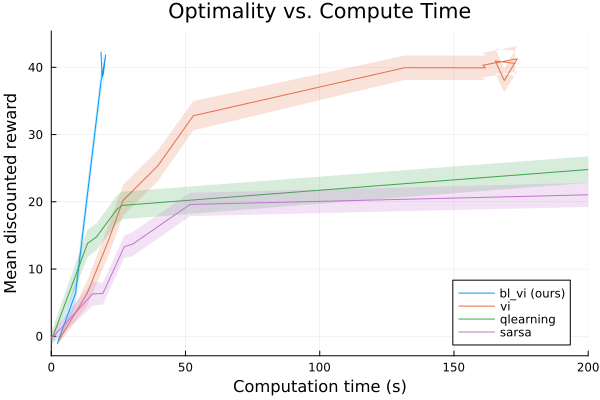

In [27]:
BiMDPs.plot_optimality_vs_compute(results, dir = dir)

## Vary grid size

In [2]:
results = BiMDPs.vary_grid_size(verbose=false, N_sim=10, dir="varygrid")

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 2 entries:
  "vi"    => ([1.59712, 24.1465, 177.853, 632.88, 1569.78], [72.517, 57.2044, 4…
  "bl_vi" => ([0.613585, 4.31046, 24.5242, 83.9571, 202.888], [54.9998, 43.6052…

In [15]:
using JLD2
fname = "varygrid"*"/"*"varygridsize-data-2023-10-05_06_21.jld2"
results = load(fname)["data"]

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 2 entries:
  "vi"    => ([1.59712, 24.1465, 177.853, 632.88, 1569.78], [72.517, 57.2044, 4…
  "bl_vi" => ([0.613585, 4.31046, 24.5242, 83.9571, 202.888], [70.9998, 53.6052…

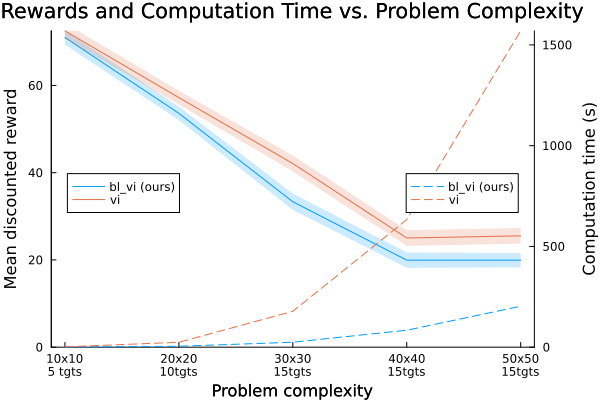

In [16]:
BiMDPs.plot_optimality_compute_vs_gridsize(results, dir="varygrid")

In [17]:
results["bl_vi"]

([0.61358478, 4.310459310000001, 24.524201299999998, 83.95706106000002, 202.88776321999998], [70.99975839387211, 53.60521007169005, 33.33709135098011, 19.94930517983841, 19.93694547410949], [15.566757724355172, 14.167922199663531, 19.500292926179934, 17.45089055828387, 15.400002418199572])

In [18]:
results["vi"]

([1.5971238, 24.1464996, 177.8534144, 632.8803058, 1569.784654], [72.51700282306224, 57.20441388754339, 42.10162060646799, 25.024893133635963, 25.524984322974195], [17.455218039368727, 14.492881157673846, 18.76287641762599, 18.176402753363075, 18.155376509089844])

In [20]:
results["bl_vi"][1][end]/results["vi"][1][end]

0.1292456023843892

In [21]:
results["bl_vi"][2][end]/results["vi"][2][end]

0.7810757186700759

## Test HL MDP

In [11]:
using POMDPs
using DiscreteValueIteration
hl_mdp = BiMDPs.HighLevelMDP(rgw)
hl_solver = ValueIterationSolver(max_iterations=100)
hl_policy = solve(hl_solver, hl_mdp);

## View stepthrough of one HL policy

In [12]:
s0 = HLRoverWorld.HLState(6,7,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

4-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(6, 7, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 15, Bool[1, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 18, Bool[1, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [13]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 105.0.


## Another example

In [14]:
s0 = HLRoverWorld.HLState(1,9,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(1, 9, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [15]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 55.0.


## From a non-starting state

In [16]:
s0 = HLRoverWorld.HLState(9,8,10,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

2-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [17]:
s0 = HLRoverWorld.HLState(9,7,9,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 7, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)